Distribuição de documentos por tópico:
topico_bertopic
-1     1934
 0      524
 1      148
 2      140
 3       90
       ... 
 60      11
 61      10
 62      10
 63      10
 64      10
Name: count, Length: 66, dtype: int64
Quantidade de documentos não classificados (outliers): 1934


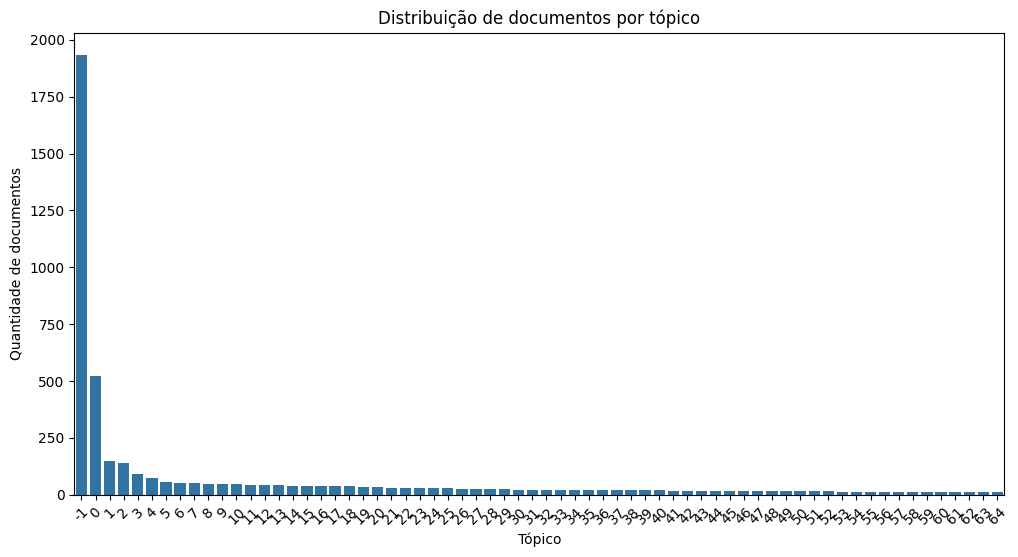


Amostras do Tópico -1:
- Não é recente um vídeo que mostra a Polícia Militar de São Paulo dispersando um bloqueio organizado por caminhoneiros em uma rodovia. As peças de desinformação tiram de contexto uma gravação feita em novembro de 2022, durante manifestações que questionavam a derrota eleitoral de Jair Bolsonaro (PL). ...

- É falso que a primeira-dama da França, Brigitte Macron, seja uma mulher transgênero, como alegam posts nas redes. As alegações transfóbicas são infundadas. Não há qualquer registro de que Brigitte, que é casada com o presidente francês Emmanuel Macron, tenha passado por cirurgia de redesignação de g ...

- A ministra do Meio Ambiente, Marina Silva, abandonou a sessão da Comissão de Infraestrutura do Senado da última terça-feira (27) após uma série de ataques dos senadores: ela teve seu microfone cortado, ouviu que deveria “se pôr no seu lugar” e foi ofendida pelo senador Plínio Valério (PSDB-AM). O ca ...


Amostras do Tópico 0:
- Trata-se de um golpe a camp

In [4]:
# 06_analise_topicos_bertopic.ipynb

# ----------------------
# ETAPA 1 - IMPORTAÇÃO DAS BIBLIOTECAS
# ----------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# ETAPA 2 - CARREGAR O DATASET GERADO PELO BERTopic
# ----------------------

caminho_csv = r'C:\Users\vbitu\projects\fake-news-etl-project\data\processed\dados_unificados_com_topicos.csv'
df = pd.read_csv(caminho_csv)

# ----------------------
# ETAPA 3 - VERIFICAR DISTRIBUIÇÃO DOS TÓPICOS
# ----------------------

# Contagem de documentos por tópico
contagem_topicos = df['topico_bertopic'].value_counts().sort_index()
print("Distribuição de documentos por tópico:")
print(contagem_topicos)

# ----------------------
# ETAPA 4 - VERIFICAR EXISTÊNCIA DE OUTLIERS (-1)
# ----------------------

qtd_outliers = (df['topico_bertopic'] == -1).sum()
print(f"Quantidade de documentos não classificados (outliers): {qtd_outliers}")

# ----------------------
# ETAPA 5 - PLOTAR DISTRIBUIÇÃO DE DOCUMENTOS POR TÓPICO
# ----------------------

plt.figure(figsize=(12,6))
sns.barplot(x=contagem_topicos.index, y=contagem_topicos.values)
plt.title('Distribuição de documentos por tópico')
plt.xlabel('Tópico')
plt.ylabel('Quantidade de documentos')
plt.xticks(rotation=45)
plt.show()

# ----------------------
# ETAPA 6 - EXIBIR AMOSTRAS DE TEXTOS POR TÓPICO PARA INSPEÇÃO
# ----------------------

# Função auxiliar para imprimir amostras de cada tópico
def mostrar_amostras_por_topico(df, topico, n=3):
    print(f"\nAmostras do Tópico {topico}:")
    amostras = df[df['topico_bertopic'] == topico].head(n)
    for i, row in amostras.iterrows():
        print("-", row['conteudo_completo'][:300], "...\n")

# Exemplo: mostrar amostras dos 3 primeiros tópicos
for topico in contagem_topicos.index[:3]:
    mostrar_amostras_por_topico(df, topico)

# ----------------------
# FIM DA ANÁLISE EXPLORATÓRIA DOS TÓPICOS
# ----------------------
